In [50]:
pip install dmba

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [51]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import dmba
from dmba import classificationSummary, gainsChart

In [52]:
df = pd.read_csv(r"C:\Users\gangu\Downloads\heartdisease.csv")
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [53]:
df.isnull().sum()

age        0
sex        0
cp         0
restbp     0
chol       0
fbs        0
restecg    0
thalach    0
exang      0
oldpeak    0
slope      0
ca         0
thal       0
num        0
dtype: int64

<Axes: >

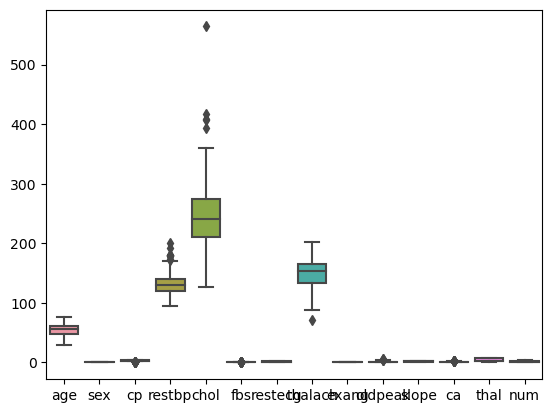

In [54]:
import seaborn as sns
sns.boxplot(df)

In [55]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca         float64
thal       float64
num          int64
dtype: object

              age       sex        cp    restbp      chol       fbs   restecg  \
age      1.000000 -0.097542  0.104139  0.284946  0.208950  0.118530  0.148868   
sex     -0.097542  1.000000  0.010084 -0.064456 -0.199915  0.047862  0.021647   
cp       0.104139  0.010084  1.000000 -0.036077  0.072319 -0.039975  0.067505   
restbp   0.284946 -0.064456 -0.036077  1.000000  0.130120  0.175340  0.146560   
chol     0.208950 -0.199915  0.072319  0.130120  1.000000  0.009841  0.171043   
fbs      0.118530  0.047862 -0.039975  0.175340  0.009841  1.000000  0.069564   
restecg  0.148868  0.021647  0.067505  0.146560  0.171043  0.069564  1.000000   
thalach -0.393806 -0.048663 -0.334422 -0.045351 -0.003432 -0.007854 -0.083389   
exang    0.091661  0.146201  0.384060  0.064762  0.061310  0.025665  0.084867   
oldpeak  0.203805  0.102173  0.202277  0.189171  0.046564  0.005747  0.114133   
slope    0.161770  0.037533  0.152050  0.117382 -0.004062  0.059894  0.133946   
ca       0.365323  0.086048 

<Axes: >

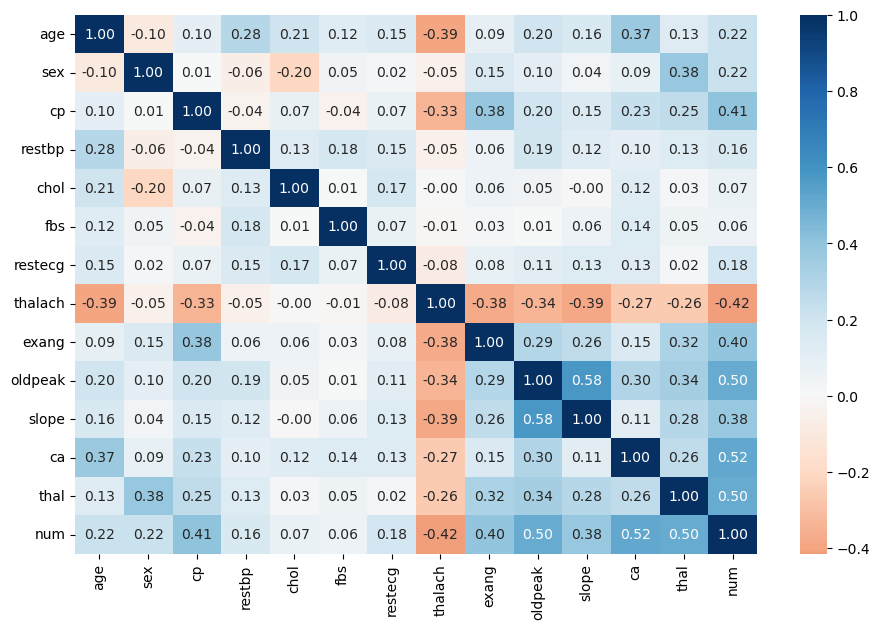

In [56]:
import matplotlib.pylab as plt
corr = df.corr()
print(corr)
fig, ax = plt.subplots()
fig.set_size_inches(11,7)
sns.heatmap(corr, annot = True, fmt='.2f', cmap="RdBu", center=0, ax=ax)

In [57]:
# Display the column names in the DataFrame
print(df.columns)

# Drop the specified columns if they exist in the DataFrame
columns_to_drop = ['slope', 'fbs']
df.drop(columns=columns_to_drop, inplace=True)

# Display the modified DataFrame
print(df)

Index(['age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')
      age  sex   cp  restbp   chol  restecg  thalach  exang  oldpeak   ca  \
0    63.0  1.0  1.0   145.0  233.0      2.0    150.0    0.0      2.3  0.0   
1    67.0  1.0  4.0   160.0  286.0      2.0    108.0    1.0      1.5  3.0   
2    67.0  1.0  4.0   120.0  229.0      2.0    129.0    1.0      2.6  2.0   
3    37.0  1.0  3.0   130.0  250.0      0.0    187.0    0.0      3.5  0.0   
4    41.0  0.0  2.0   130.0  204.0      2.0    172.0    0.0      1.4  0.0   
..    ...  ...  ...     ...    ...      ...      ...    ...      ...  ...   
298  45.0  1.0  1.0   110.0  264.0      0.0    132.0    0.0      1.2  0.0   
299  68.0  1.0  4.0   144.0  193.0      0.0    141.0    0.0      3.4  2.0   
300  57.0  1.0  4.0   130.0  131.0      0.0    115.0    1.0      1.2  1.0   
301  57.0  0.0  2.0   130.0  236.0      2.0    174.0    0.0      0.0  1.0   

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

predictors = ['age', 'sex', 'cp', 'restbp', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']
outcome = 'num' 

x = df[predictors]
y = df[outcome]

train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.4, random_state=42)

nb_model = GaussianNB()
nb_model.fit(train_x, train_y)

y_train_pred = nb_model.predict(train_x)
y_valid_pred = nb_model.predict(valid_x)

print("Training Classification Report:")
print(classification_report(train_y, y_train_pred))

print("Validation Classification Report:")
print(classification_report(valid_y, y_valid_pred))


Training Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       100
           1       0.44      0.38      0.41        32
           2       0.41      0.37      0.39        19
           3       0.36      0.48      0.41        21
           4       0.50      0.22      0.31         9

    accuracy                           0.65       181
   macro avg       0.51      0.46      0.47       181
weighted avg       0.65      0.65      0.64       181

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        64
           1       0.24      0.17      0.20        23
           2       0.08      0.06      0.07        17
           3       0.22      0.43      0.29        14
           4       0.00      0.00      0.00         4

    accuracy                           0.52       122
   macro avg       0.28      0.29      0.28       122
weighted av

In [61]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

# Define features and target variable
X = df[['age', 'sex', 'cp', 'restbp', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']]
y = df['num']

# Create a pipeline with StandardScaler and MultinomialNB
pipeline = make_pipeline(StandardScaler(), GaussianNB())

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X, y, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", np.mean(cv_scores))

# Optionally, you can also print the classification report for each fold
for i, (train_idx, test_idx) in enumerate(StratifiedKFold(n_splits=5, random_state=42, shuffle=True).split(X, y)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Fit the model on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Print classification report for each fold
    print(f"\nClassification Report for Fold {i+1}:")
    print(classification_report(y_test, y_pred))


Cross-validation scores: [0.55737705 0.59016393 0.44262295 0.6        0.55      ]
Average cross-validation score: 0.5480327868852459

Classification Report for Fold 1:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.23      0.27      0.25        11
           2       0.20      0.14      0.17         7
           3       0.18      0.29      0.22         7
           4       0.00      0.00      0.00         3

    accuracy                           0.54        61
   macro avg       0.30      0.30      0.30        61
weighted avg       0.57      0.54      0.55        61


Classification Report for Fold 2:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        33
           1       0.22      0.18      0.20        11
           2       0.00      0.00      0.00         7
           3       0.33      0.43      0.38         7
           4       0.25      0.33    